**Agglomerative Clustering**

In [17]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn import metrics

In [20]:
df = pd.read_csv(r"C:\Users\User\Downloads\Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [23]:
#Selecing columns
df = pd.read_csv(r"C:\Users\User\Downloads\Mall_Customers.csv" , usecols=['Annual Income (k$)' , 'Spending Score (1-100)'])
df

#usecols = to use specific columns w.r.t  columns names

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

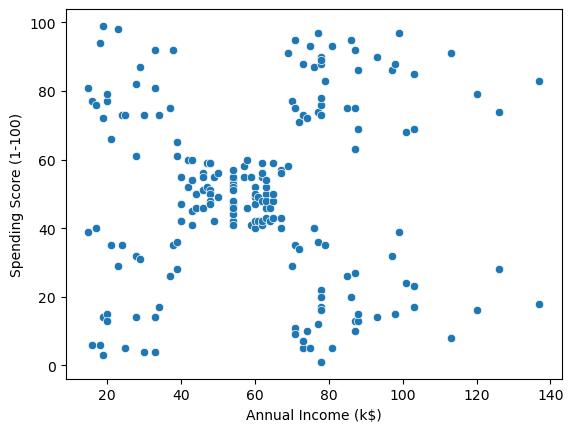

In [15]:
sns.scatterplot(x = df.iloc[:,0] , y = df.iloc[:,1])

In [16]:
agg = AgglomerativeClustering()
agg.fit_predict(df)

#Giving 2 cluster 0 and 1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [18]:
metrics.silhouette_score(df, agg.labels_) 

0.36706444723912895

In [19]:
metrics.silhouette_score(df, agg.fit_predict(df))
#both can do to find silhout score

0.36706444723912895

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

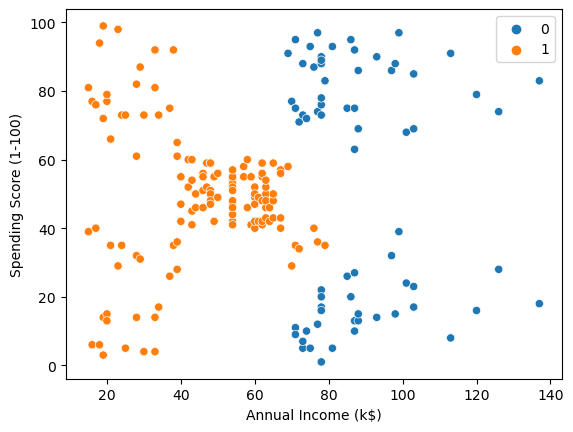

In [24]:
sns.scatterplot(x = df.iloc[:,0] , y = df.iloc[:,1] , hue =  agg.fit_predict(df))

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

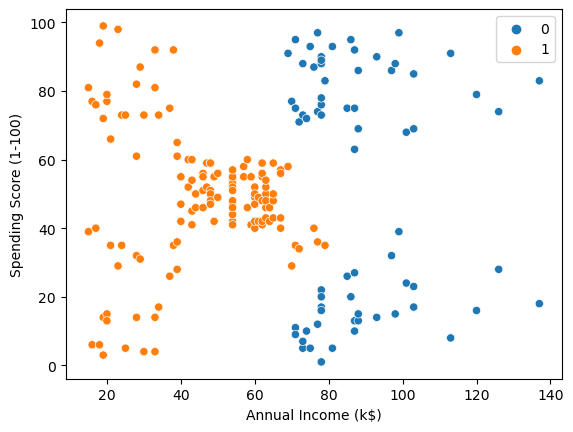

In [26]:
sns.scatterplot(x = df.iloc[:,0] , y = df.iloc[:,1] , hue =  agg.labels_)

0.4618340266628975


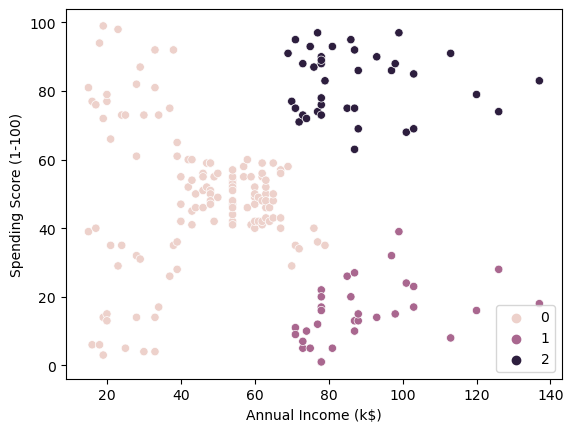

In [29]:
#n_cluster---3
agg = AgglomerativeClustering(n_clusters=3)
agg.fit_predict(df)
sns.scatterplot(x = df.iloc[:,0] , y = df.iloc[:,1] , hue =  agg.labels_)
print(metrics.silhouette_score(df, agg.labels_))

0.5529945955148897


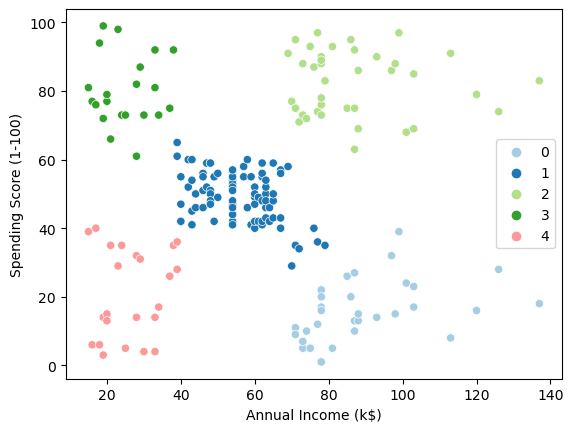

In [35]:
#n_cluster---5
agg = AgglomerativeClustering(n_clusters=5)
agg.fit_predict(df)

sns.scatterplot(x = df.iloc[:,0] , y = df.iloc[:,1] , hue =  agg.labels_ , palette='Paired')
print(metrics.silhouette_score(df, agg.labels_))

#pallete for different colours

### Find Optimal value for n_cluster 
### Based on dendrogram

In [39]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

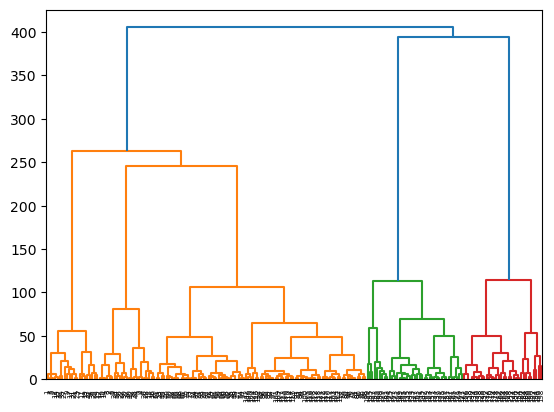

In [41]:
x = hierarchy.linkage(df, method='ward')
hierarchy.dendrogram(x)

plt.show() 

**Longest verticle line connecting 5 points , so 5 will be optimal value of hyperparameter**

0.5529945955148897


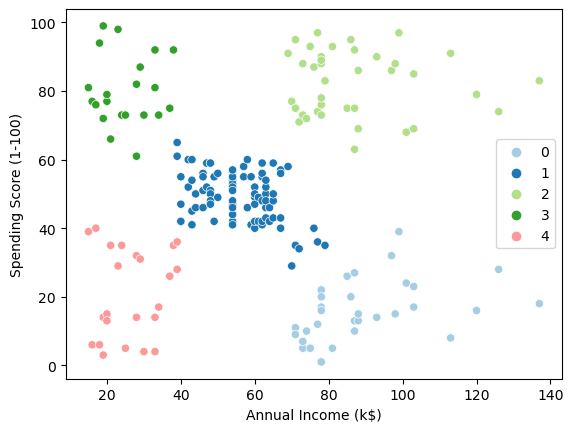

In [43]:
#Optimal n_cluster---5
agg = AgglomerativeClustering(n_clusters=5)
agg.fit_predict(df)

sns.scatterplot(x = df.iloc[:,0] , y = df.iloc[:,1] , hue =  agg.labels_ , palette='Paired')
print(metrics.silhouette_score(df, agg.labels_))

#pallete for different colours

**Another simple method to find optimal value**

In [46]:
for i in range(2,20):
    agg = AgglomerativeClustering(n_clusters=i)
    agg.fit_predict(df)
    
    print(f"{i} : {metrics.silhouette_score(df, agg.labels_)}")

2 : 0.36706444723912895
3 : 0.4618340266628975
4 : 0.4916598193892782
5 : 0.5529945955148897
6 : 0.5380208285578872
7 : 0.519904611908887
8 : 0.4326286245782246
9 : 0.43892545672004507
10 : 0.4342656377895271
11 : 0.4235291810694601
12 : 0.4292221461834499
13 : 0.4115159018886883
14 : 0.4116644433478917
15 : 0.41938401859787305
16 : 0.4191386867941397
17 : 0.4123238100861266
18 : 0.422988685948502
19 : 0.42079092019236053


In [ ]:
#5 giving more silhoutt score, 5 will be optimal value